In [1]:
# 9,CongestionWindow
# 17,SmoothedRTT
# 20,RetransmissionTimeout
# 21,SocketSendBufferSize
# 22,SocketSendBufferBytes
# 23,SocketReceiveBufferSize
# 24,SocketReceiveBufferBytes
# 25,UnacknowledgedBytes

# # With ECN and no ECN

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import matplotlib.pyplot as plt
# from gym import wrappers
# from gym import spaces
import math
import random
import re
import os
import sys
import seaborn as sns

# import gym
# import tensorflow as tf
# from tensorflow.keras import layers
col = ['Direction', 'Hash', 'Time', 'LocalIP', 'LocalPort', 'ForeignIP', 'ForeignPort', 'SlowStartThreshold', 'CongestionWindow', 'BandwidthControlledWindow', 'SendingWindow', 'ReceiveWindow', 'SendingWindowScalingFactor', 'ReceiveWindowScalingFactor', 'TCPFiniteStateMachine',
       'MaximumSegmentSize', 'SmoothedRTT', 'SACKEnabled', 'TCPFlags', 'RetransmissionTimeout', 'SocketSendBufferSize', 'SocketSendBufferBytes', 'SocketReceiveBufferSize', 'SocketReceiveBufferBytes', 'UnacknowledgedBytes', 'ReassemblyQueue', 'Flowid', 'Flowtype']


In [3]:
# plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100, 'font.size':16})

In [4]:
def functionfilenameandpath(path='./', extension='.log'):
    filepaths = []
    filenames = []

    for root, _, files_list in os.walk(path):
        for file_name in files_list:
            if file_name.endswith(extension):
                file_name_path = os.path.join(root, file_name)
                filenames.append(file_name)
                filepaths.append(file_name_path)

    return filenames, filepaths

In [5]:
folderpath="./datatest1"
filenames,filepaths=functionfilenameandpath(folderpath,'.log')

filepaths.sort()
filenames.sort()
print(filenames)

['codel1_ecn.siftr.log', 'codel1_noecn.siftr.log', 'codel2_ecn.siftr.log', 'codel2_noecn.siftr.log', 'fqcodel1_ecn.siftr.log', 'fqcodel1_noecn.siftr.log', 'fqcodel2_ecn.siftr.log', 'fqcodel2_noecn.siftr.log', 'fqpie1_ecn.siftr.log', 'fqpie1_noecn.siftr.log', 'fqpie2_ecn.siftr.log', 'fqpie2_noecn.siftr.log', 'pie1_ecn.siftr.log', 'pie1_noecn.siftr.log', 'pie2_ecn.siftr.log', 'pie2_noecn.siftr.log']


In [6]:
def remove_outliers_iqr(df, column_name):
    """
    Remove outliers from a specified column in a DataFrame using the IQR method.
    
    Parameters:
    df (pd.DataFrame): The DataFrame.
    column_name (str): The name of the column from which to remove outliers.
    
    Returns:
    pd.DataFrame: The DataFrame with outliers removed.
    """
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

count    9401.000000
mean        0.171535
std         0.045771
min         0.000000
25%         0.145000
50%         0.175937
75%         0.191250
max         0.821875
Name: SmoothedRTT, dtype: float64
16480    0.000000
16596    0.821875
16604    0.821875
16705    0.738125
16706    0.738125
Name: SmoothedRTT, dtype: float64
53042    0.605625
53116    0.547500
53119    0.491563
53121    0.491563
53122    0.491563
Name: SmoothedRTT, dtype: float64


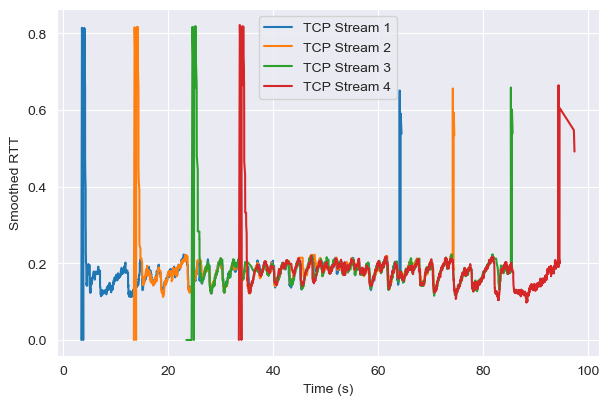

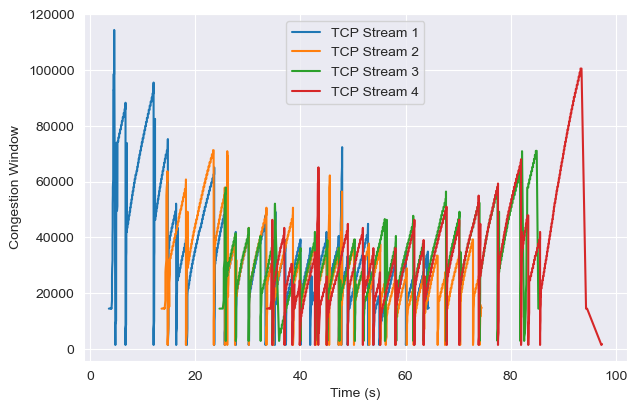

count    9321.000000
mean        0.165507
std         0.034806
min         0.000000
25%         0.145000
50%         0.166563
75%         0.182500
max         0.621563
Name: SmoothedRTT, dtype: float64
16551    0.000000
16682    0.621563
16683    0.621563
16814    0.567813
16815    0.567813
Name: SmoothedRTT, dtype: float64
52643    0.464062
52644    0.464062
52684    0.418750
52686    0.418750
52687    0.418750
Name: SmoothedRTT, dtype: float64


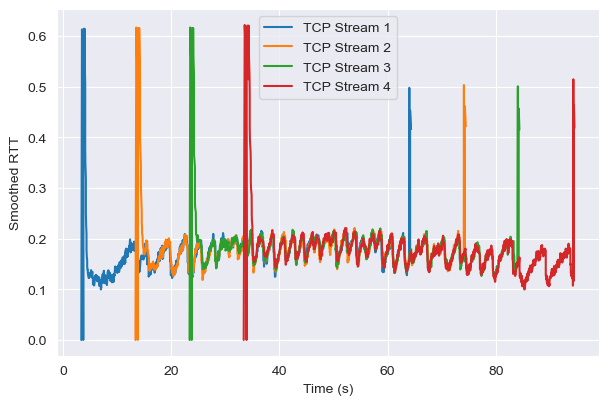

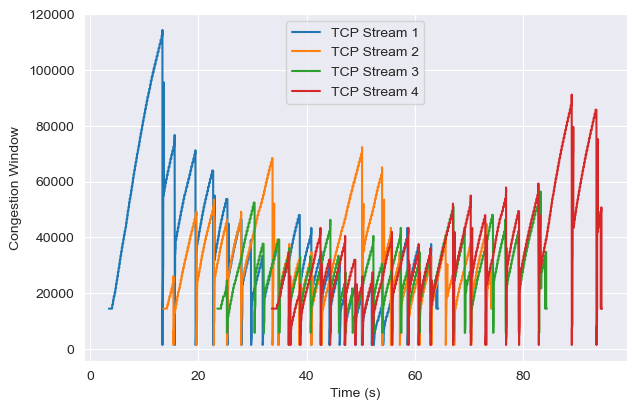

count    1196.000000
mean        0.977154
std         0.281923
min         0.000000
25%         0.704844
50%         1.075469
75%         1.207500
max         1.417812
Name: SmoothedRTT, dtype: float64
2117    0.000000
2188    0.424063
2189    0.424063
2271    0.516250
2272    0.516250
Name: SmoothedRTT, dtype: float64
6824    0.628750
6825    0.628750
6856    0.569063
6858    0.569063
6859    0.569063
Name: SmoothedRTT, dtype: float64


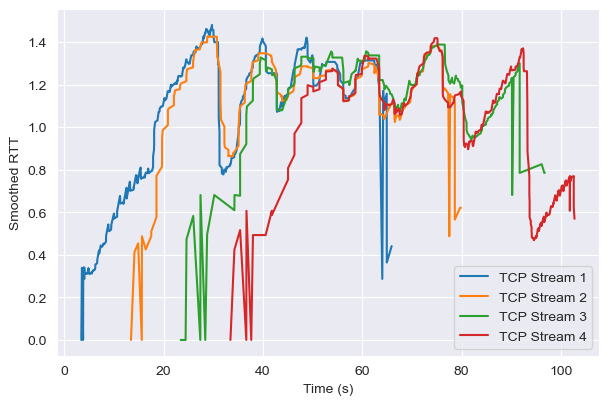

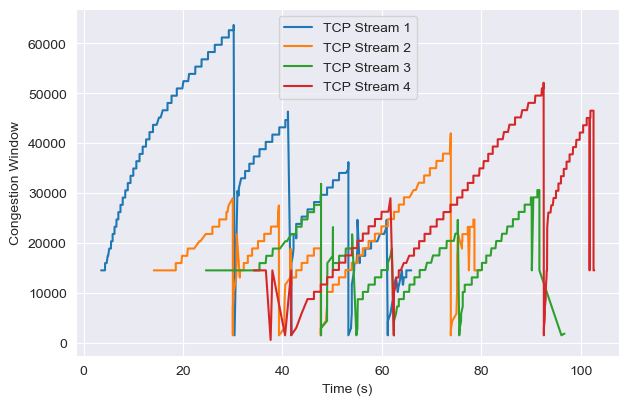

count    1013.000000
mean        0.934067
std         0.268484
min         0.000000
25%         0.706250
50%         0.846875
75%         1.178438
max         1.432500
Name: SmoothedRTT, dtype: float64
2130    0.000000
2203    0.374375
2204    0.374375
2266    0.426563
2267    0.426563
Name: SmoothedRTT, dtype: float64
6628    0.512188
6629    0.512188
6651    0.462187
6653    0.462187
6654    0.462187
Name: SmoothedRTT, dtype: float64


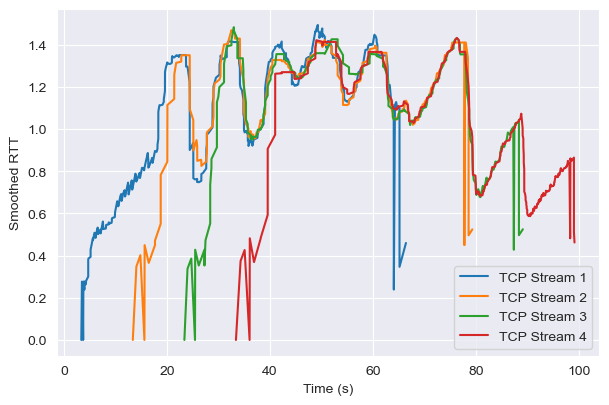

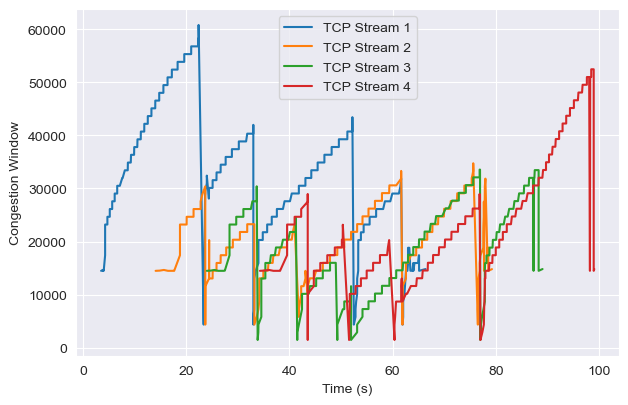

count    9427.000000
mean        0.168296
std         0.032694
min         0.000000
25%         0.150938
50%         0.169063
75%         0.185312
max         0.608750
Name: SmoothedRTT, dtype: float64
15661    0.000000
15769    0.608750
15777    0.608750
15897    0.550312
15898    0.550312
Name: SmoothedRTT, dtype: float64
51762    0.455625
51821    0.418750
51823    0.418750
51824    0.418750
51836    0.169687
Name: SmoothedRTT, dtype: float64


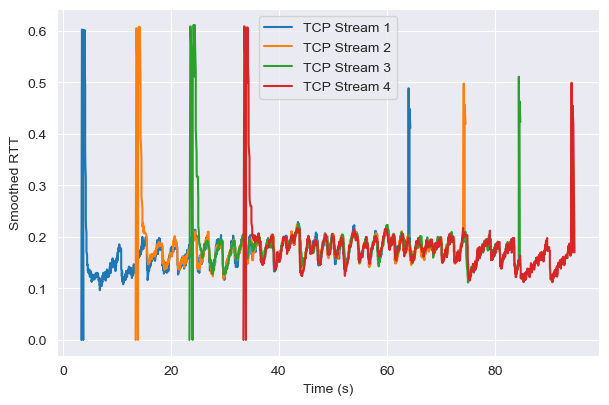

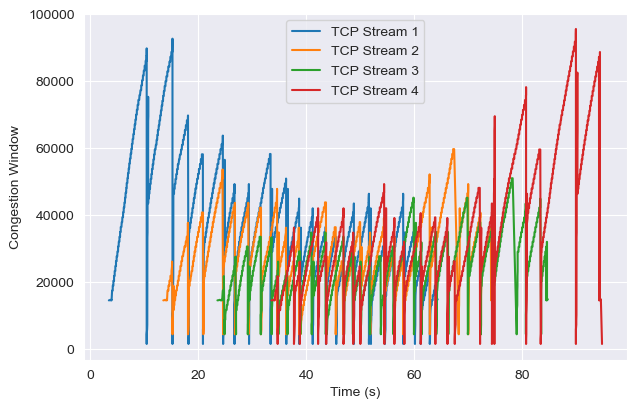

count    9920.000000
mean        0.166267
std         0.030456
min         0.000000
25%         0.146875
50%         0.167813
75%         0.184375
max         0.549687
Name: SmoothedRTT, dtype: float64
16352    0.000000
16454    0.547188
16455    0.547188
16563    0.504062
16564    0.504062
Name: SmoothedRTT, dtype: float64
52717    0.424687
52718    0.424687
52781    0.388125
52783    0.388125
52784    0.388125
Name: SmoothedRTT, dtype: float64


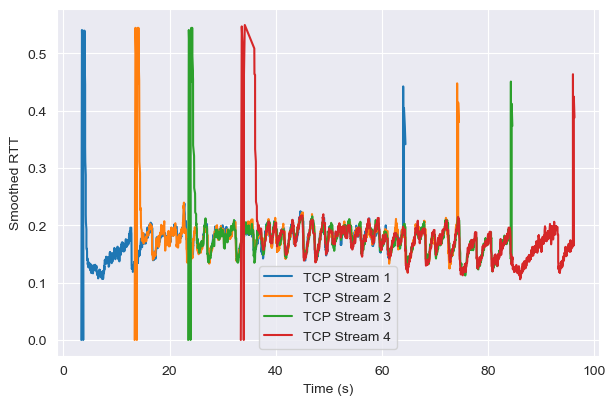

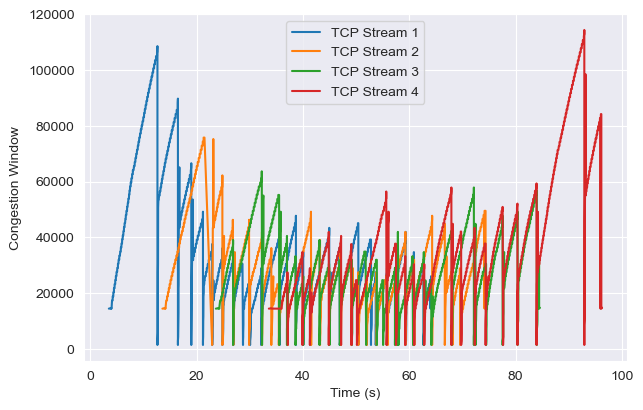

count    970.000000
mean       0.893576
std        0.261225
min        0.000000
25%        0.688438
50%        0.818594
75%        1.074375
max        1.458438
Name: SmoothedRTT, dtype: float64
2128    0.000000
2189    0.000000
2195    0.356875
2211    0.356875
2289    0.450000
Name: SmoothedRTT, dtype: float64
6728    0.565000
6729    0.565000
6757    0.516875
6759    0.516875
6760    0.516875
Name: SmoothedRTT, dtype: float64


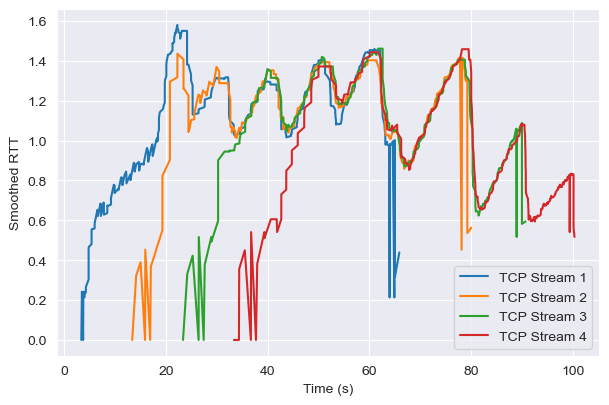

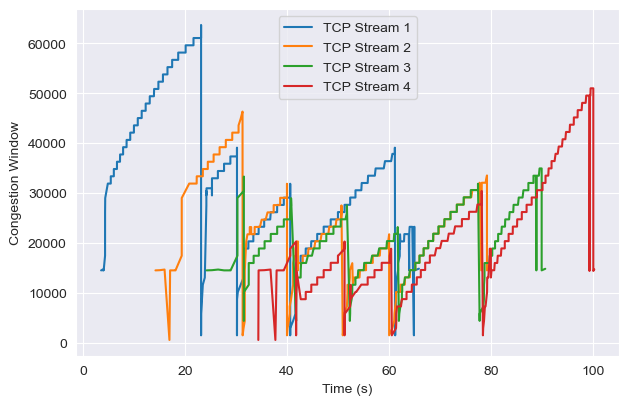

count    1075.000000
mean        0.946496
std         0.266965
min         0.000000
25%         0.712812
50%         0.983437
75%         1.152969
max         1.416250
Name: SmoothedRTT, dtype: float64
2139    0.000000
2178    0.000000
2215    0.398750
2247    0.398750
2329    0.520312
Name: SmoothedRTT, dtype: float64
6712    0.614375
6713    0.614375
6742    0.551562
6744    0.551562
6745    0.551562
Name: SmoothedRTT, dtype: float64


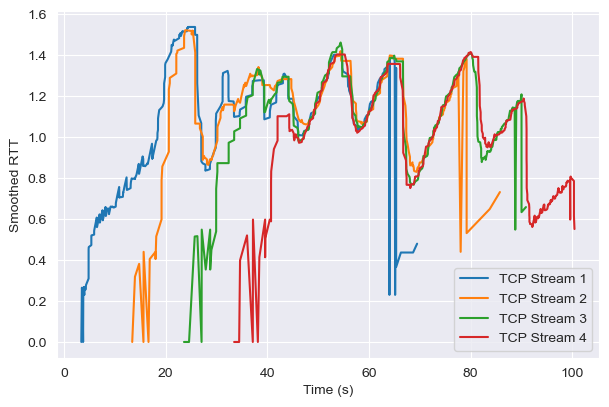

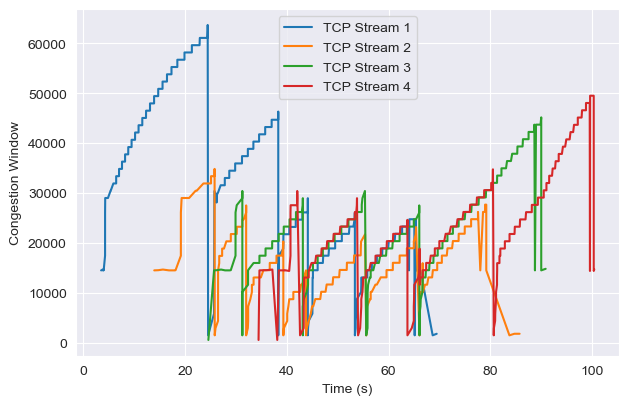

count    9159.000000
mean        0.164980
std         0.032275
min         0.000000
25%         0.144687
50%         0.166563
75%         0.183125
max         0.573438
Name: SmoothedRTT, dtype: float64
15263    0.000000
15376    0.573438
15377    0.573438
15494    0.526875
15495    0.526875
Name: SmoothedRTT, dtype: float64
51207    0.439688
51208    0.439688
51268    0.406250
51270    0.406250
51271    0.406250
Name: SmoothedRTT, dtype: float64


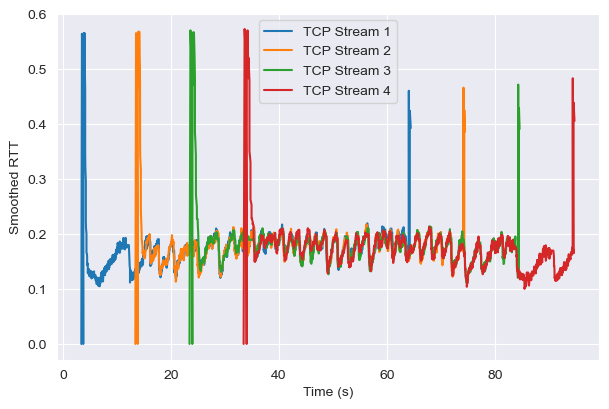

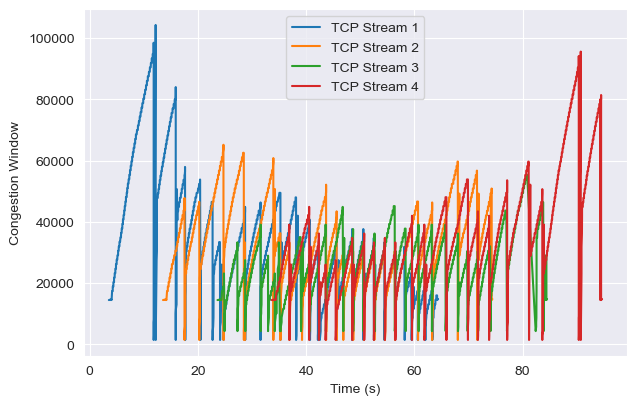

count    7592.000000
mean        0.168384
std         0.034680
min         0.000000
25%         0.147187
50%         0.171563
75%         0.186875
max         0.601250
Name: SmoothedRTT, dtype: float64
16249    0.00000
16373    0.60125
16374    0.60125
16497    0.54875
16498    0.54875
Name: SmoothedRTT, dtype: float64
51642    0.451875
51643    0.451875
51670    0.410625
51672    0.410625
51673    0.410625
Name: SmoothedRTT, dtype: float64


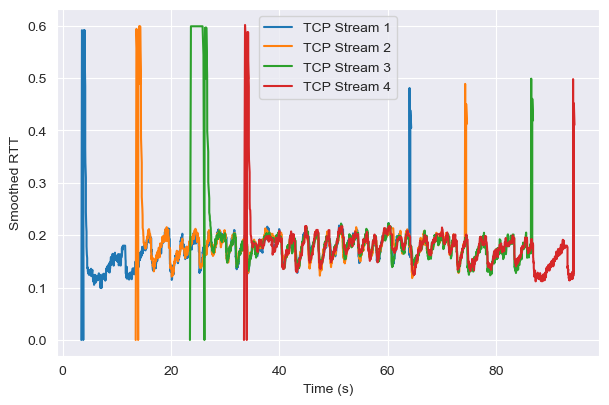

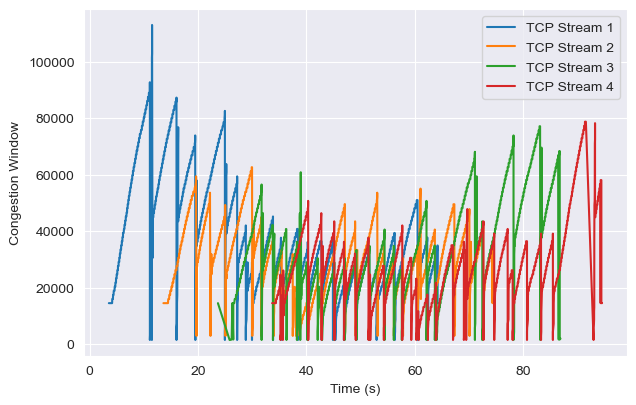

count    1266.000000
mean        0.984862
std         0.269591
min         0.000000
25%         0.780000
50%         0.942187
75%         1.181563
max         1.525313
Name: SmoothedRTT, dtype: float64
2140    0.000000
2222    0.375312
2223    0.375312
2297    0.455937
2298    0.455937
Name: SmoothedRTT, dtype: float64
6720    0.571875
6721    0.571875
6746    0.514375
6748    0.514375
6749    0.514375
Name: SmoothedRTT, dtype: float64


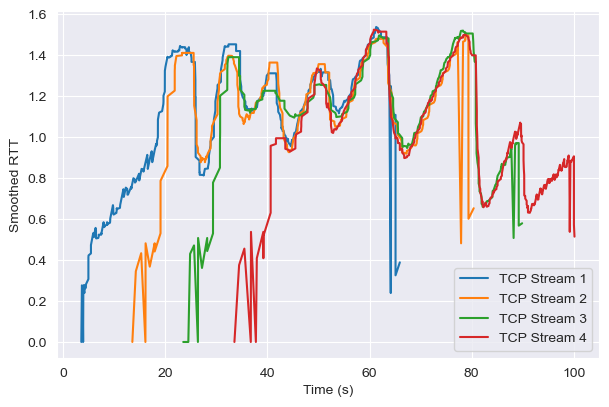

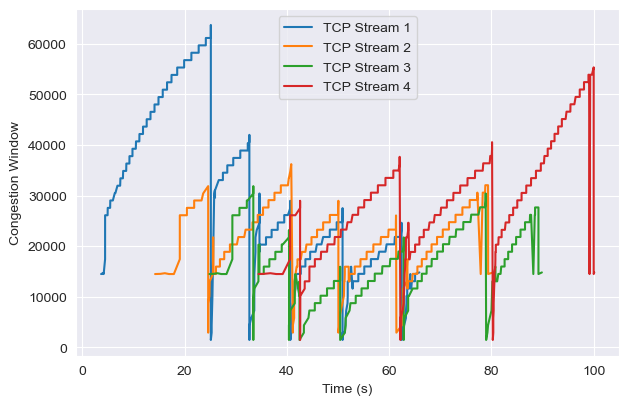

count    1181.000000
mean        0.981086
std         0.253600
min         0.000000
25%         0.770625
50%         0.953438
75%         1.185625
max         1.515000
Name: SmoothedRTT, dtype: float64
2115    0.000000
2192    0.368750
2199    0.368750
2259    0.425312
2260    0.425312
Name: SmoothedRTT, dtype: float64
6647    0.526250
6648    0.526250
6674    0.478125
6676    0.478125
6677    0.478125
Name: SmoothedRTT, dtype: float64


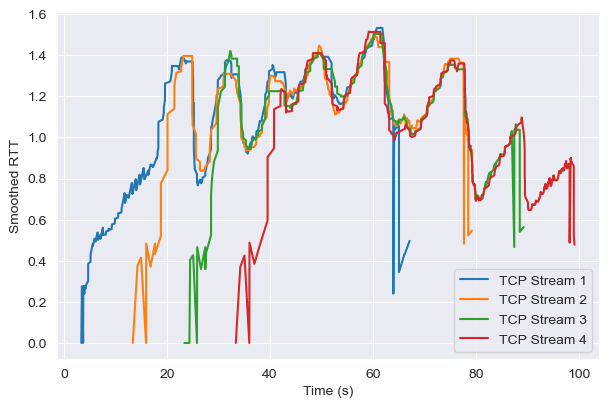

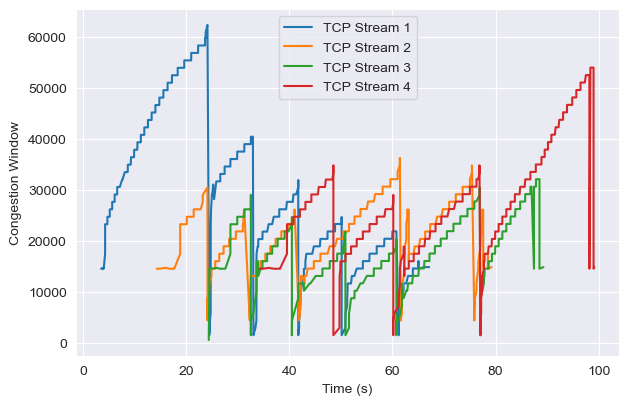

count    9404.000000
mean        0.166695
std         0.032018
min         0.000000
25%         0.146875
50%         0.167187
75%         0.184062
max         0.585938
Name: SmoothedRTT, dtype: float64
16290    0.000000
16408    0.585938
16409    0.585938
16539    0.537813
16540    0.537813
Name: SmoothedRTT, dtype: float64
52486    0.457813
52487    0.457813
52558    0.419375
52560    0.419375
52561    0.419375
Name: SmoothedRTT, dtype: float64


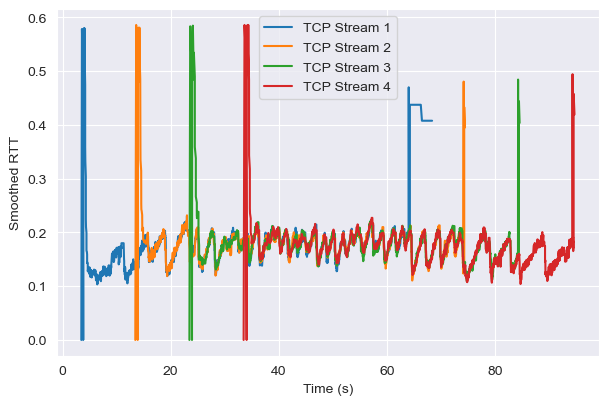

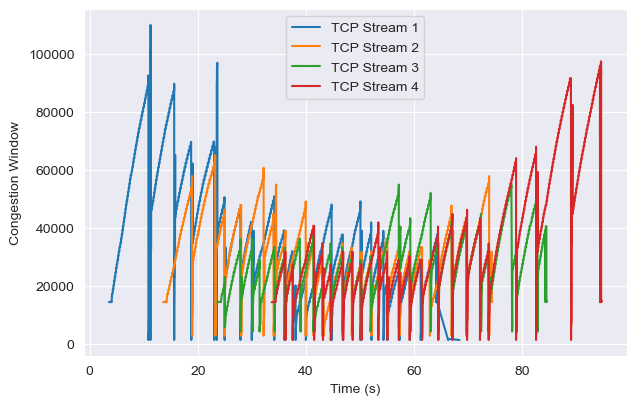

count    8671.000000
mean        0.163745
std         0.033639
min         0.000000
25%         0.141875
50%         0.161875
75%         0.182812
max         0.555000
Name: SmoothedRTT, dtype: float64
15964    0.000000
16085    0.555000
16086    0.555000
16233    0.509375
16234    0.509375
Name: SmoothedRTT, dtype: float64
52242    0.425312
52243    0.425312
52273    0.385937
52275    0.385937
52276    0.385937
Name: SmoothedRTT, dtype: float64


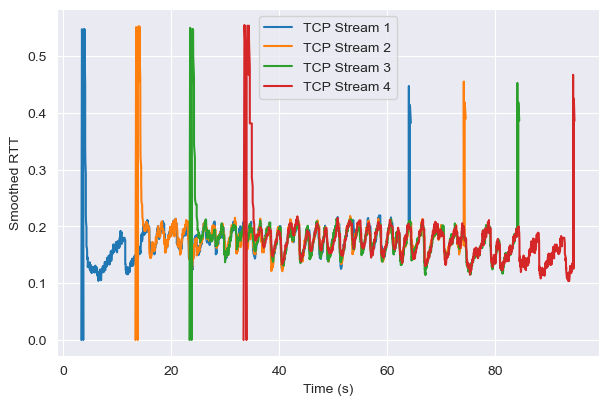

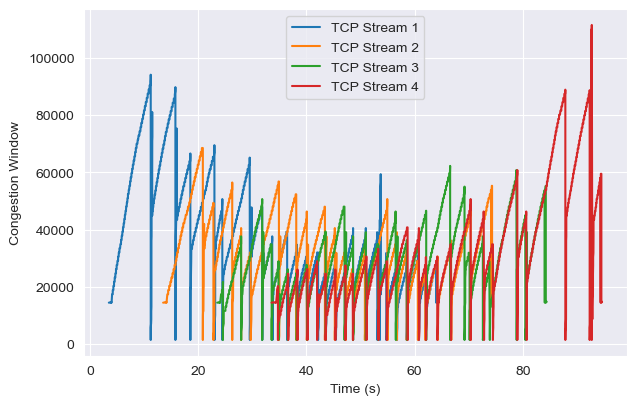

count    1282.000000
mean        0.997329
std         0.251720
min         0.000000
25%         0.794375
50%         0.961875
75%         1.194687
max         1.446250
Name: SmoothedRTT, dtype: float64
2120    0.000000
2190    0.000000
2215    0.434688
2216    0.434688
2312    0.544375
Name: SmoothedRTT, dtype: float64
6746    0.640312
6747    0.640312
6773    0.576562
6775    0.576562
6776    0.576562
Name: SmoothedRTT, dtype: float64


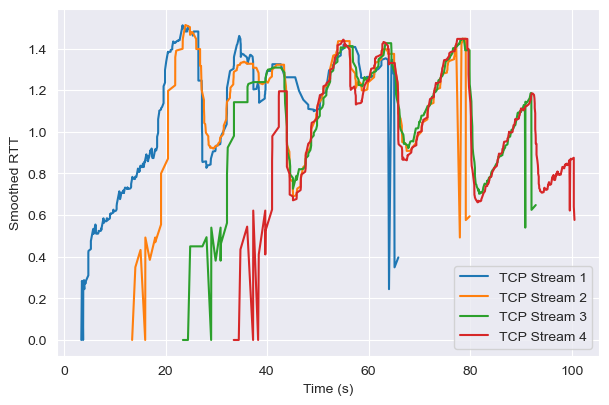

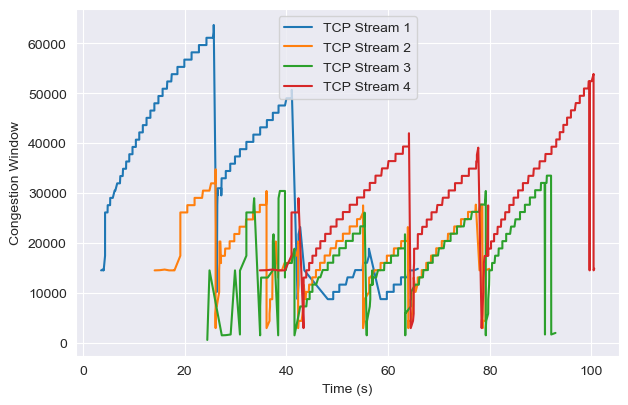

count    1052.000000
mean        0.946936
std         0.283516
min         0.000000
25%         0.722969
50%         0.896562
75%         1.178984
max         1.546250
Name: SmoothedRTT, dtype: float64
2122    0.000000
2187    0.000000
2194    0.384062
2195    0.384062
2268    0.473750
Name: SmoothedRTT, dtype: float64
6701    0.595625
6702    0.595625
6741    0.543750
6743    0.543750
6744    0.543750
Name: SmoothedRTT, dtype: float64


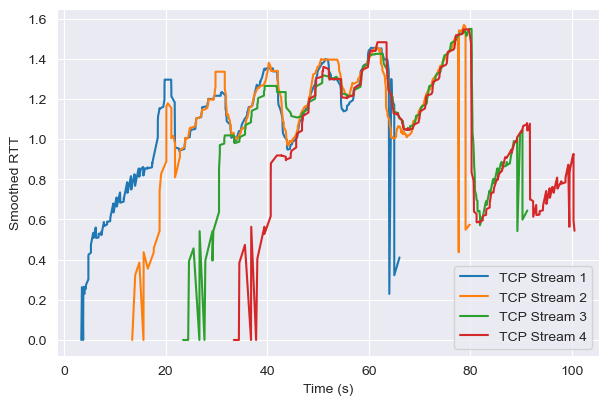

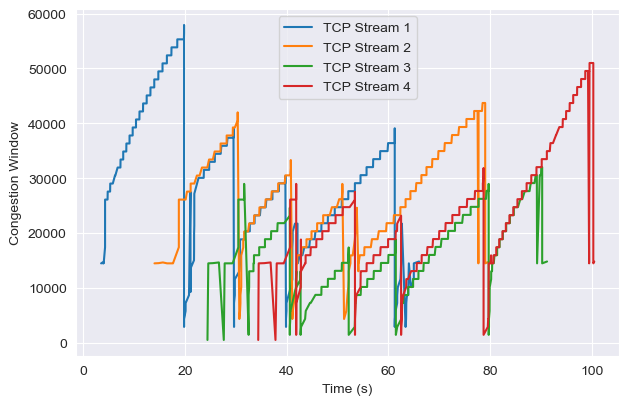

In [7]:
dataframe_list=[]
data_filename_list=[]
data_dict={}
for index in range(len(filenames)):
    # open d:/work/mptcp/twopathMPdata/test1/twopathtype1.siftr.log
    data = []
    with open("./datatest1/"+filenames[index], 'r') as f:
        # store the data
        for line in f:
            tem = re.sub(r'\s', '', line)
            data.append(tem.split(','))
    # remove file line of data
    data.pop(0)
    data.pop(len(data)-1)

    # define variables from enable_time_secs=1716792031	enable_time_usecs=061770	
    # siftrver=1.2.4 hz=100	tcp_rtt_scale=32	sysname=FreeBSD	sysver=1301000	ipmode=4
    enable_time_secs = 1716792031
    enable_time_usecs = 61770
    siftver = '1.2.4'
    hz = 100
    tcp_rtt_scale = 32
    sysname = 'FreeBSD'
    sysver = 1301000
    ipmode = 4



    df = pd.DataFrame(data, columns=col)

    df=df[df['Direction']=='o']

    # congestion window to int
    df = df.astype({'CongestionWindow': 'int32'})
    
    # Convert 'Time' column to float64 type
    df['Time'] = df['Time'].astype('float64')

    # Subtract the first time entry from all the entries in 'Time' column
    df['Time'] = df['Time'] - df['Time'].iloc[0]



    # remove rows that congestion window bigger than 70000
    # df = df[df['CongestionWindow'].astype(int) < 70000]
    # RTT divide by tcp_rtt_scale * hz
    df['SmoothedRTT'] = df['SmoothedRTT'].astype('float64')
    df['SmoothedRTT'] = df['SmoothedRTT'] / (tcp_rtt_scale * hz)
    df['SmoothedRTT'] = df['SmoothedRTT'].astype('float64')

    



    # first path ForeignPort = 5101
    dfPath1 = df.loc[(df['ForeignPort'] == '5101')]

    # second path localip = 5102
    dfPath2 = df.loc[(df['ForeignPort'] == '5102')]

    # third path ForeignPort = 5101
    dfPath3 = df.loc[(df['ForeignPort'] == '5103' )]

    # fourth path localip = 5102
    dfPath4 = df.loc[(df['ForeignPort'] == '5104')]
    
    # data_filename_list.append(filenames[index])
    # dataframe_list.append(dfPath1.copy())
    # data_dict[filenames[index]]=dfPath1.copy()
    print(dfPath4['SmoothedRTT'].describe())
    print(dfPath4['SmoothedRTT'].head(5))
    print(dfPath4['SmoothedRTT'].tail(5))

    


    

    # Plot Smoothed RTT vs Time
    plt.figure(figsize=(7, 4.5))  # Set the figure size to fit within the column width
    sns.set_style("darkgrid")  # Set the style to darkgrid
    
    plt.plot(dfPath1['Time'], dfPath1['SmoothedRTT'], label='TCP Stream 1')
    plt.plot(dfPath2['Time'], dfPath2['SmoothedRTT'], label='TCP Stream 2')
    plt.plot(dfPath3['Time'], dfPath3['SmoothedRTT'], label='TCP Stream 3')
    plt.plot(dfPath4['Time'], dfPath4['SmoothedRTT'], label='TCP Stream 4')
    plt.xlabel('Time (s)')
    plt.ylabel('Smoothed RTT')
    # plt.title(filenames[index])
    plt.legend()
    plt.grid(True)
    # plt.savefig("./iperf3_tests/"+title+"-"+"Graphs.png", dpi=100,bbox_inches='tight')
    plt.savefig("./Graphs/"+filenames[index]+"_SmoothedRTT.png", dpi=300,bbox_inches='tight')
    plt.show()

    dfpath1_filtered = remove_outliers_iqr(dfPath1,"CongestionWindow")
    dfpath2_filtered = remove_outliers_iqr(dfPath2,"CongestionWindow")
    dfpath3_filtered = remove_outliers_iqr(dfPath3,"CongestionWindow")
    dfpath4_filtered = remove_outliers_iqr(dfPath4,"CongestionWindow")

    # Plot CWND vs Time
    plt.figure(figsize=(7, 4.5))  # Set the figure size to fit within the column width
    sns.set_style("darkgrid")  # Set the style to darkgrid
   
    plt.plot(dfpath1_filtered['Time'], dfpath1_filtered['CongestionWindow'], label='TCP Stream 1')
    plt.plot(dfpath2_filtered['Time'], dfpath2_filtered['CongestionWindow'], label='TCP Stream 2')
    plt.plot(dfpath3_filtered['Time'], dfpath3_filtered['CongestionWindow'], label='TCP Stream 3')
    plt.plot(dfpath4_filtered['Time'], dfpath4_filtered['CongestionWindow'], label='TCP Stream 4')
    plt.xlabel('Time (s)')
    plt.ylabel('Congestion Window')
    # plt.title(filenames[index])
    plt.legend()
    plt.grid(True)
    # plt.savefig("./iperf3_tests/"+title+"-"+"Graphs.png", dpi=100,bbox_inches='tight')
    plt.savefig("./Graphs/"+filenames[index]+"_CWND.png", dpi=300,bbox_inches='tight')
    plt.show()
    


In [8]:
# dataframe_list=[]
# data_filename_list=[]
# data_dict={}
# for index in range(len(filenames)):
#     # open d:/work/mptcp/twopathMPdata/test1/twopathtype1.siftr.log
#     data = []
#     with open("./datatest1/"+filenames[index], 'r') as f:
#         # store the data
#         for line in f:
#             tem = re.sub(r'\s', '', line)
#             data.append(tem.split(','))
#     # remove file line of data
#     data.pop(0)
#     data.pop(len(data)-1)

#     # define variables from enable_time_secs=1716792031	enable_time_usecs=061770	
#     # siftrver=1.2.4 hz=100	tcp_rtt_scale=32	sysname=FreeBSD	sysver=1301000	ipmode=4
#     enable_time_secs = 1716792031
#     enable_time_usecs = 61770
#     siftver = '1.2.4'
#     hz = 100
#     tcp_rtt_scale = 32
#     sysname = 'FreeBSD'
#     sysver = 1301000
#     ipmode = 4



#     df = pd.DataFrame(data, columns=col)

#     # congestion window to int
#     df = df.astype({'CongestionWindow': 'int32'})
    
#     # Convert 'Time' column to float64 type
#     df['Time'] = df['Time'].astype('float64')

#     # Subtract the first time entry from all the entries in 'Time' column
#     df['Time'] = df['Time'] - df['Time'].iloc[0]



#     # remove rows that congestion window bigger than 70000
#     # df = df[df['CongestionWindow'].astype(int) < 70000]
#     # RTT divide by tcp_rtt_scale * hz
#     df['SmoothedRTT'] = df['SmoothedRTT'].astype('float64')
#     df['SmoothedRTT'] = df['SmoothedRTT'] / (tcp_rtt_scale * hz)
#     df['SmoothedRTT'] = df['SmoothedRTT'].astype('float64')



#     # first path ForeignPort = 5101
#     dfPath1 = df.loc[(df['ForeignPort'] == '5101')]

#     # second path localip = 5102
#     dfPath2 = df.loc[(df['ForeignPort'] == '5102')]

#     # third path ForeignPort = 5101
#     dfPath3 = df.loc[(df['ForeignPort'] == '5103' )]

#     # fourth path localip = 5102
#     dfPath4 = df.loc[(df['ForeignPort'] == '5104')]
    
#     # data_filename_list.append(filenames[index])
#     # dataframe_list.append(dfPath1.copy())
#     # data_dict[filenames[index]]=dfPath1.copy()
#     print(dfPath4['SmoothedRTT'].describe())
#     print(dfPath4['SmoothedRTT'].head(5))
#     print(dfPath4['SmoothedRTT'].tail(5))


    

#     # Plot Smoothed RTT vs Time
#     plt.figure(figsize=(10, 6))
#     plt.plot(dfPath1['Time'], dfPath1['SmoothedRTT'], label='TCP Stream 1')
#     plt.plot(dfPath2['Time'], dfPath2['SmoothedRTT'], label='TCP Stream 2')
#     plt.plot(dfPath3['Time'], dfPath3['SmoothedRTT'], label='TCP Stream 3')
#     plt.plot(dfPath4['Time'], dfPath4['SmoothedRTT'], label='TCP Stream 4')
#     plt.xlabel('Time (s)')
#     plt.ylabel('Smoothed RTT')
#     plt.title(filenames[index])
#     plt.legend()
#     plt.grid(True)
#     plt.show()

#     # Plot CWND vs Time
#     plt.figure(figsize=(10, 6))
#     plt.plot(dfPath1['Time'], dfPath1['CongestionWindow'], label='TCP Stream 1')
#     plt.plot(dfPath2['Time'], dfPath2['CongestionWindow'], label='TCP Stream 2')
#     plt.plot(dfPath3['Time'], dfPath3['CongestionWindow'], label='TCP Stream 3')
#     plt.plot(dfPath4['Time'], dfPath4['CongestionWindow'], label='TCP Stream 4')
#     plt.xlabel('Time (s)')
#     plt.ylabel('Congestion Window')
#     plt.title(filenames[index])
#     plt.legend()
#     plt.grid(True)
#     plt.show()

    
#     break;
    


In [9]:
for i in range(len(col)):
    print(i,end=",")
    print(col[i])


0,Direction
1,Hash
2,Time
3,LocalIP
4,LocalPort
5,ForeignIP
6,ForeignPort
7,SlowStartThreshold
8,CongestionWindow
9,BandwidthControlledWindow
10,SendingWindow
11,ReceiveWindow
12,SendingWindowScalingFactor
13,ReceiveWindowScalingFactor
14,TCPFiniteStateMachine
15,MaximumSegmentSize
16,SmoothedRTT
17,SACKEnabled
18,TCPFlags
19,RetransmissionTimeout
20,SocketSendBufferSize
21,SocketSendBufferBytes
22,SocketReceiveBufferSize
23,SocketReceiveBufferBytes
24,UnacknowledgedBytes
25,ReassemblyQueue
26,Flowid
27,Flowtype
